El dataset utilizado en este proyecto contiene reseñas de usuarios sobre videojuegos disponibles en la plataforma **Steam**, el mismo fue extraido de Kaggle(https://www.kaggle.com/datasets/andrewmvd/steam-reviews). Cada registro representa una opinión escrita por un usuario, junto con el nombre del juego al que hace referencia.

El objetivo principal de este análisis es trabajar con técnicas de procesamiento de lenguaje natural y Deep Learning para entender el contenido de las reseñas, clasificarlas por sentimiento (positivo, negativo o neutro), y visualizar las palabras más representativas mediante nubes de palabras.

Con el fin de reducir el tamaño del dataset (que en su comienzo tenia aproximadamente 6 mllones de filas) se trabajo especialmente con las reseñas del juego Counter Strike, permitiendo asi un tratamiento mas eficiente y especxificvo
Dentro del conjunto de datos, se trabajó especialmente con las reseñas relacionadas al juego Counter-Strike, con el fin de reducir el tamaño del dataset y enfocar el análisis en un solo título, permitiendo así un tratamiento más eficiente y específico del lenguaje utilizado por los usuarios.

# Librerias

In [67]:
import pandas as pd
import numpy as np
from google.colab import drive
import re
import string
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dropout, Dense

# Proyecto Counter Strike

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data science/data3/dataset.csv')

In [ ]:
df

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1
...,...,...,...,...,...
6417101,99910,Puzzle Pirates,I really ove this game but it needs somethings...,-1,0
6417102,99910,Puzzle Pirates,"Used to play Puzzel Pirates 'way back when', b...",-1,0
6417103,99910,Puzzle Pirates,"This game was aright, though a bit annoying. W...",-1,0
6417104,99910,Puzzle Pirates,"I had a nice review to recommend this game, bu...",-1,0


In [ ]:
df.drop(['review_score', 'review_votes', 'app_id'], axis=1, inplace=True)

In [ ]:
df

,app_name,review_text
0,Counter-Strike,Ruined my life.
1,Counter-Strike,This will be more of a ''my experience with th...
2,Counter-Strike,This game saved my virginity.
3,Counter-Strike,• Do you like original games? • Do you like ga...
4,Counter-Strike,"Easy to learn, hard to master."
...,...,...
6417101,Puzzle Pirates,I really ove this game but it needs somethings...
6417102,Puzzle Pirates,"Used to play Puzzel Pirates 'way back when', b..."
6417103,Puzzle Pirates,"This game was aright, though a bit annoying. W..."
6417104,Puzzle Pirates,"I had a nice review to recommend this game, bu..."


In [43]:
reviews_cs = df[df["app_name"].str.lower() == "counter-strike"]
reviews_cs

,app_name,review_text
0,Counter-Strike,Ruined my life.
1,Counter-Strike,This will be more of a ''my experience with th...
2,Counter-Strike,This game saved my virginity.
3,Counter-Strike,• Do you like original games? • Do you like ga...
4,Counter-Strike,"Easy to learn, hard to master."
...,...,...
12348,Counter-Strike,&gt;never played any counter-strike &gt;Buys g...
12349,Counter-Strike,"This is where a new era began: LAN parties, st..."
12350,Counter-Strike,10/10 would shoot a bullet from a silenced rif...
12351,Counter-Strike,Good old school game. Some cheaters though whi...


In [44]:
reviews = reviews_cs[['review_text']].copy()
reviews

,review_text
0,Ruined my life.
1,This will be more of a ''my experience with th...
2,This game saved my virginity.
3,• Do you like original games? • Do you like ga...
4,"Easy to learn, hard to master."
...,...
12348,&gt;never played any counter-strike &gt;Buys g...
12349,"This is where a new era began: LAN parties, st..."
12350,10/10 would shoot a bullet from a silenced rif...
12351,Good old school game. Some cheaters though whi...


In [45]:
def limpieza (texto):
    texto = str(texto).lower()

    texto = re.sub(r'\[.*?\]', '', texto)

    texto = re.sub(r'https?://\S+\www\.\S+', '', texto)

    texto = re.sub(r'<.*?>+', '', texto)

    texto = re.sub('[%s]' % re.escape(string.punctuation), '', texto)

    texto = re.sub(r'\n', '', texto)

    texto = re.sub(r'\w*\d\w*', '', texto)

    texto = re.sub(r'[^\x00-\x7F]+', '', texto)

    texto = texto.strip()

    return texto

In [46]:
reviews['reviews_limpios'] = reviews['review_text'].apply(limpieza)

In [47]:
reviews

,review_text,reviews_limpios
0,Ruined my life.,ruined my life
1,This will be more of a ''my experience with th...,this will be more of a my experience with this...
2,This game saved my virginity.,this game saved my virginity
3,• Do you like original games? • Do you like ga...,do you like original games do you like games ...
4,"Easy to learn, hard to master.",easy to learn hard to master
...,...,...
12348,&gt;never played any counter-strike &gt;Buys g...,gtnever played any counterstrike gtbuys game g...
12349,"This is where a new era began: LAN parties, st...",this is where a new era began lan parties stea...
12350,10/10 would shoot a bullet from a silenced rif...,would shoot a bullet from a silenced rifle thr...
12351,Good old school game. Some cheaters though whi...,good old school game some cheaters though whic...


In [48]:
!python -m spacy download en_core_web_sm

In [49]:
import spacy

In [50]:
nlp = spacy.load("en_core_web_sm")

In [51]:
def tokenizar(texto):
    doc = nlp(texto)
    return [token.text for token in doc]

In [52]:
reviews["tokens"] = reviews["reviews_limpios"].apply(tokenizar)

In [53]:
reviews

,review_text,reviews_limpios,tokens
0,Ruined my life.,ruined my life,"[ruined, my, life]"
1,This will be more of a ''my experience with th...,this will be more of a my experience with this...,"[this, will, be, more, of, a, my, experience, ..."
2,This game saved my virginity.,this game saved my virginity,"[this, game, saved, my, virginity]"
3,• Do you like original games? • Do you like ga...,do you like original games do you like games ...,"[do, you, like, original, games, , do, you, l..."
4,"Easy to learn, hard to master.",easy to learn hard to master,"[easy, to, learn, hard, to, master]"
...,...,...,...
12348,&gt;never played any counter-strike &gt;Buys g...,gtnever played any counterstrike gtbuys game g...,"[gtnever, played, any, counterstrike, gtbuys, ..."
12349,"This is where a new era began: LAN parties, st...",this is where a new era began lan parties stea...,"[this, is, where, a, new, era, began, lan, par..."
12350,10/10 would shoot a bullet from a silenced rif...,would shoot a bullet from a silenced rifle thr...,"[would, shoot, a, bullet, from, a, silenced, r..."
12351,Good old school game. Some cheaters though whi...,good old school game some cheaters though whic...,"[good, old, school, game, some, cheaters, thou..."


In [54]:
def procesar_texto(texto):
    doc = nlp(texto)
    tokens_limpios = [
        token.lemma_.lower()
        for token in doc
        if not token.is_stop and not token.is_punct and token.is_alpha
    ]
    return tokens_limpios

In [56]:
reviews["token_no_stopwords__token_lematizado"] = reviews["reviews_limpios"].apply(procesar_texto)

In [57]:
reviews

,review_text,reviews_limpios,tokens,token_no_stopwords__token_lematizado
0,Ruined my life.,ruined my life,"[ruined, my, life]","[ruin, life]"
1,This will be more of a ''my experience with th...,this will be more of a my experience with this...,"[this, will, be, more, of, a, my, experience, ...","[experience, game, type, review, say, thing, l..."
2,This game saved my virginity.,this game saved my virginity,"[this, game, saved, my, virginity]","[game, save, virginity]"
3,• Do you like original games? • Do you like ga...,do you like original games do you like games ...,"[do, you, like, original, games, , do, you, l...","[like, original, game, like, game, not, lag, l..."
4,"Easy to learn, hard to master.",easy to learn hard to master,"[easy, to, learn, hard, to, master]","[easy, learn, hard, master]"
...,...,...,...,...
12348,&gt;never played any counter-strike &gt;Buys g...,gtnever played any counterstrike gtbuys game g...,"[gtnever, played, any, counterstrike, gtbuys, ...","[gtnever, play, counterstrike, gtbuy, game, gt..."
12349,"This is where a new era began: LAN parties, st...",this is where a new era began lan parties stea...,"[this, is, where, a, new, era, began, lan, par...","[new, era, begin, lan, party, steam, computer,..."
12350,10/10 would shoot a bullet from a silenced rif...,would shoot a bullet from a silenced rifle thr...,"[would, shoot, a, bullet, from, a, silenced, r...","[shoot, bullet, silence, rifle, foot, thick, c..."
12351,Good old school game. Some cheaters though whi...,good old school game some cheaters though whic...,"[good, old, school, game, some, cheaters, thou...","[good, old, school, game, cheater, admin, serv..."


In [59]:
todos_los_tokens = reviews["token_no_stopwords__token_lematizado"].explode()
contador = Counter(todos_los_tokens)

print (contador.most_common(10))

[('game', 9632), ('good', 4059), ('play', 3407), ('not', 1436), ('old', 1330), ('cs', 1241), ('time', 1078), ('fps', 1073), ('great', 966), ('like', 958)]


In [ ]:
!pip install TextBlob

In [60]:
from textblob import TextBlob

def sentimiento (txt):
    sentim = TextBlob(txt).sentiment.polarity

    if sentim > 0.1:
        return "Positiva"

    if sentim >= -0.1 and sentim <= 0.1:
        return "Neutro"

    if sentim < 0.1:
        return "Negativo"

In [61]:
reviews["sentimiento"] = reviews['reviews_limpios'].apply(lambda x: sentimiento(" ".join(x) if isinstance(x, list) else str(x)))
reviews

,review_text,reviews_limpios,tokens,token_no_stopwords__token_lematizado,sentimiento
0,Ruined my life.,ruined my life,"[ruined, my, life]","[ruin, life]",Neutro
1,This will be more of a ''my experience with th...,this will be more of a my experience with this...,"[this, will, be, more, of, a, my, experience, ...","[experience, game, type, review, say, thing, l...",Positiva
2,This game saved my virginity.,this game saved my virginity,"[this, game, saved, my, virginity]","[game, save, virginity]",Negativo
3,• Do you like original games? • Do you like ga...,do you like original games do you like games ...,"[do, you, like, original, games, , do, you, l...","[like, original, game, like, game, not, lag, l...",Positiva
4,"Easy to learn, hard to master.",easy to learn hard to master,"[easy, to, learn, hard, to, master]","[easy, learn, hard, master]",Neutro
...,...,...,...,...,...
12348,&gt;never played any counter-strike &gt;Buys g...,gtnever played any counterstrike gtbuys game g...,"[gtnever, played, any, counterstrike, gtbuys, ...","[gtnever, play, counterstrike, gtbuy, game, gt...",Neutro
12349,"This is where a new era began: LAN parties, st...",this is where a new era began lan parties stea...,"[this, is, where, a, new, era, began, lan, par...","[new, era, begin, lan, party, steam, computer,...",Negativo
12350,10/10 would shoot a bullet from a silenced rif...,would shoot a bullet from a silenced rifle thr...,"[would, shoot, a, bullet, from, a, silenced, r...","[shoot, bullet, silence, rifle, foot, thick, c...",Neutro
12351,Good old school game. Some cheaters though whi...,good old school game some cheaters though whic...,"[good, old, school, game, some, cheaters, thou...","[good, old, school, game, cheater, admin, serv...",Negativo


In [ ]:
!pip install wordcloud

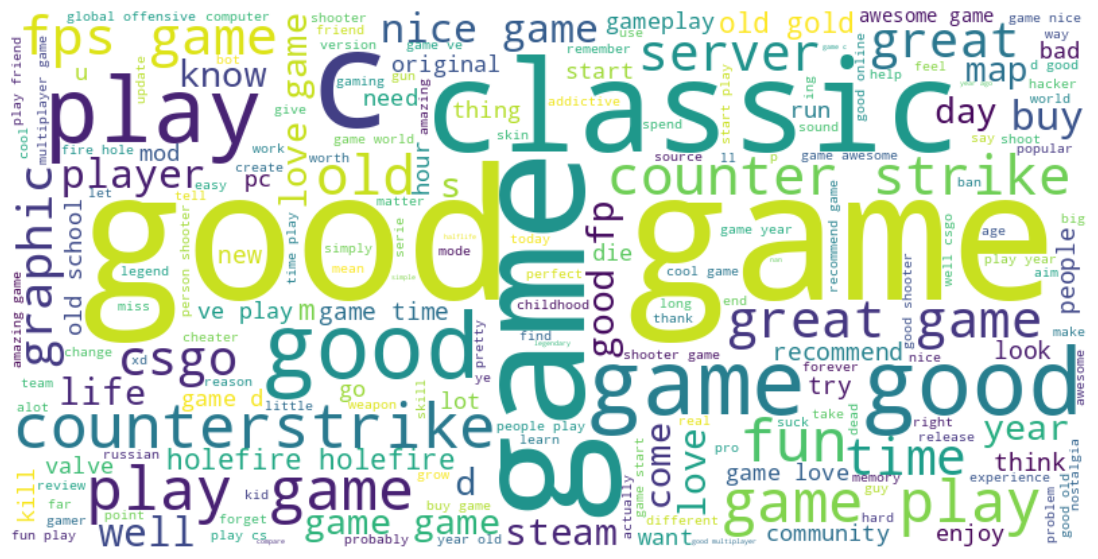

In [63]:
from wordcloud import WordCloud

tokens_limpios = [str(token) for token in sum(reviews["token_no_stopwords__token_lematizado"], []) if pd.notnull(token)]
texto_completo = ' '.join(tokens_limpios)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_completo)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

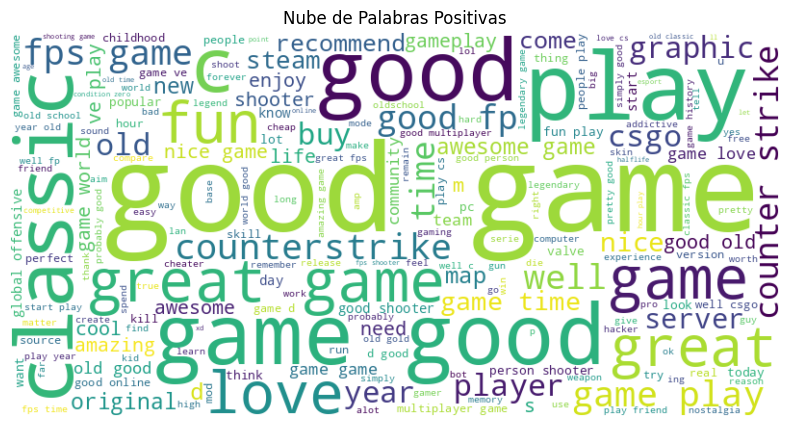

In [64]:
tokens_pos = reviews[reviews['sentimiento'] == 'Positiva']['token_no_stopwords__token_lematizado']

tokens_pos = tokens_pos.explode().dropna().astype(str)
texto_pos = " ".join(tokens_pos)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(texto_pos)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras Positivas")
plt.show()

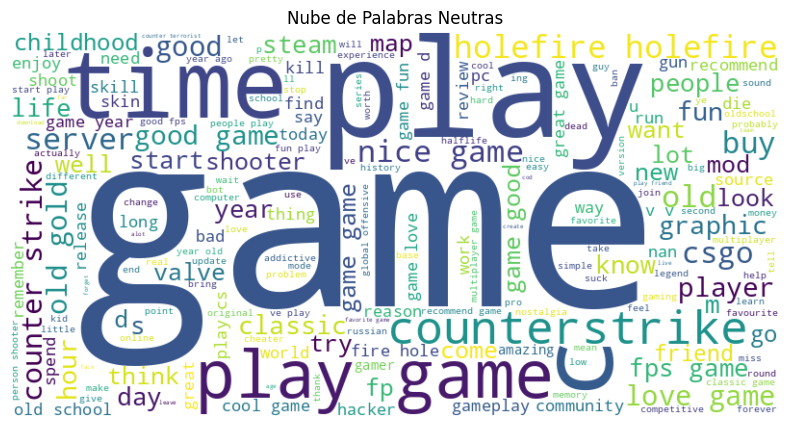

In [65]:
tokens_pos = reviews[reviews['sentimiento'] == 'Neutro']['token_no_stopwords__token_lematizado']

tokens_pos = tokens_pos.explode().dropna().astype(str)
texto_pos = " ".join(tokens_pos)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(texto_pos)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras Neutras")
plt.show()

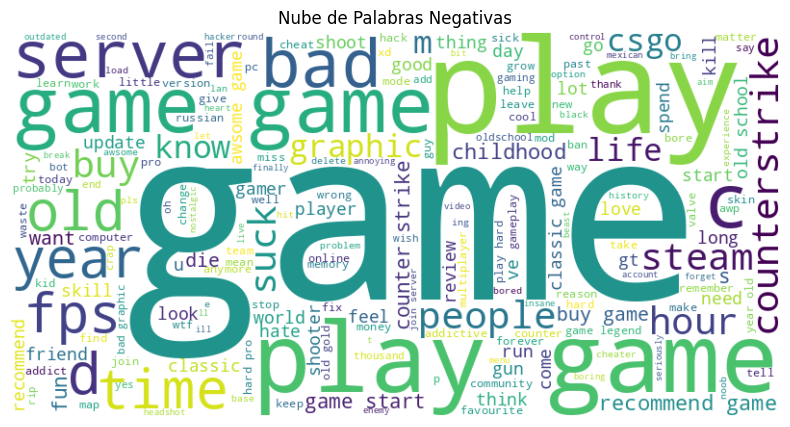

In [66]:
tokens_pos = reviews[reviews['sentimiento'] == 'Negativo']['token_no_stopwords__token_lematizado']

tokens_pos = tokens_pos.explode().dropna().astype(str)
texto_pos = " ".join(tokens_pos)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(texto_pos)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras Negativas")
plt.show()

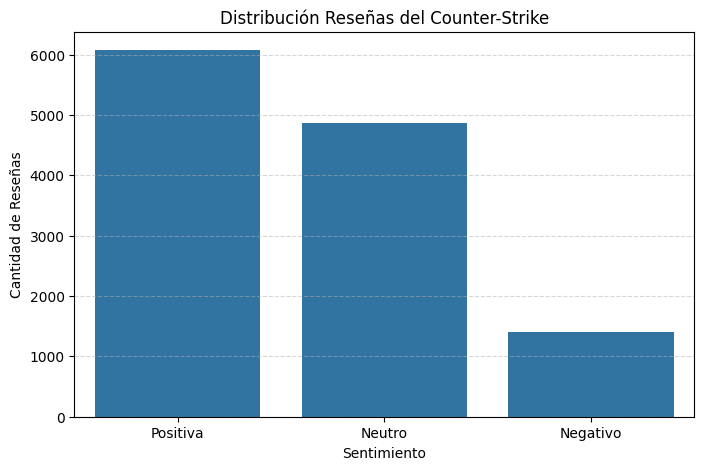

In [68]:
conteo = reviews["sentimiento"].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=conteo.index, y=conteo.values)
plt.title("Distribución Reseñas del Counter-Strike")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad de Reseñas")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Se analizaron alrededor de 12.000 reseñas del juego **Counter-Strike**.
- Se aplicó un análisis de sentimiento utilizando TextBlob, clasificando las reseñas en:
  - Positivas (si polarity era mayor a 0.1)
  - Neutras (si polarity era mayor a -0.1 y menor a 0.1)
  - Negativas (si polarity era menor a -0.1)

- Las reseñas fueron en su mayoria clasificadas como positivas, con una gran cantidad de reseñas neutras, lo que suguiere que el juego tuvo bastante aceptacion en la comunidad.

- Las nubes de palabras positivas destacan términos como: good, fun, great, free, awesome, entre otras.

- Algunas reseñas no fueron calificadas correctamente debido a que contenian frases ironicas, o emojis, cosa que el modelo no interpreta del todo bien.(ej: THATS MY GAME :), que la clasifico como negativa ).


In [69]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

encoder = LabelEncoder()
etiquetas_codificadas = encoder.fit_transform(reviews['sentimiento'])
y = to_categorical(etiquetas_codificadas, num_classes=3)


In [71]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(reviews["reviews_limpios"])

secuencias = tokenizer.texts_to_sequences(reviews["reviews_limpios"])
padded = pad_sequences(secuencias, padding='post', maxlen=100)

vocab_size = len(tokenizer.word_index) + 1

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded, y, test_size=0.2, random_state=42)

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64))
model.add(GlobalAveragePooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

historial = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.4921 - loss: 0.9769 - val_accuracy: 0.4852 - val_loss: 0.9581
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5209 - loss: 0.9403 - val_accuracy: 0.6503 - val_loss: 0.8855
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6513 - loss: 0.8473 - val_accuracy: 0.7110 - val_loss: 0.7561
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7296 - loss: 0.6948 - val_accuracy: 0.5225 - val_loss: 0.8520
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7411 - loss: 0.6052 - val_accuracy: 0.7689 - val_loss: 0.5855
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7835 - loss: 0.5297 - val_accuracy: 0.7487 - val_loss: 0.6435
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8186 - loss: 0.4716 - val_accuracy: 0.8090 - val_loss: 0.5147
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8511 - loss: 0.4106 - val_accur

El modelo comenzó con una precisión de entrenamiento del 49% y una precisión de validación del 48% en el primer epoch, indicando un rendimiento inicial pobre.

A lo largo de los 10 epochs, el modelo mostró una mejora significativa, alcanzando una precisión de entrenamiento del 88% y una precisión de validación del 83.6% en el ultimo. Esto refleja una buena capacidad del modelo para aprender de los datos y generalizar.

El valor de perdida en entrenamiento bajó de 0.97 a 0.33, y en validación de 0.95 a 0.43, lo que indica una optimización efectiva del modelo.